# Data Visualization and Non-deep baseline models

## import dependencies 

In [143]:
import os
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns 


## load data

In [205]:
cby_data =[]
data = []
for f in os.listdir('CitationByYearData'):
    dir = 'CitationByYearData/'+f
    dis_data = pd.read_csv(dir)
    data.append(dis_data)
cby_df = pd.concat(data)
cby_df = cby_df.dropna()
cby_df = cby_df.drop_duplicates(subset ='paperId',keep='first')
cby_df = cby_df.sample(frac=1)

#remove outliers
Q1 = cby_df.quantile(0.25)
Q3 = cby_df.quantile(0.75)
IQR = Q3 - Q1

cby_df = cby_df[~((cby_df < (Q1 - 1.5 * IQR)) |(cby_df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)
cby_df

C:\Users\61765\AppData\Local\Temp/ipykernel_12676/947283996.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cby_df = cby_df[~((cby_df < (Q1 - 1.5 * IQR)) |(cby_df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)


,paperId,title,abstract,year,referenceCount,citationCount,influentialCitationCount,year0_citation_count,year1_citation_count,year2_citation_count,year3_citation_count,year4_citation_count,year5_citation_count,year6_citation_count,year7_citation_count,year8_citation_count,year9_citation_count
0,32ec68b2743eeb4eaa763ad7f1dcad5084b4d750,Detecting a transition-metal ammine at tailore...,The fabrication of surfaces by forming Langmui...,1997,59,2,0,0,0,0,0,0,0,0,0,0,0
1,3b0e247ba755394854b6a88d4552c0bbced9a175,Zirconium catalyzed CC bond formation reaction...,The carbon-carbon bond formation reactions of ...,1993,27,23,0,0,1,3,4,2,2,0,0,1,1
2,f42c704b3e66fc05d4140897486099ca1d057917,Highly enantioselective rhodium-catalyzed conj...,The rhodium-phosphoramidite-catalyzed asymmetr...,2005,47,27,0,0,2,3,1,3,3,6,3,1,1
3,6632a3d7d9f19b7c38b0338270d489862a228afe,"Argadin, a new chitinase inhibitor, produced b...","A new chitinase inhibitor, designated as argad...",2000,0,82,1,0,2,5,3,2,4,4,1,7,3
4,73604fccadf2f53f37ae43ecc223b865948e3a8d,The Nearby Supernova Factory: First Results,The Nearby Supernova Factory aims at discoveri...,2009,9,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11433,1f60586779eec5165803cf3f82b3d3fc6cb62953,UV Light‐Emitting Diode Fabricated on Hetero‐E...,Using a hetero-epitaxial lateral overgrowth (E...,2002,11,44,0,1,1,2,3,0,4,4,3,5,1
11434,01a5bd2bdddef255db04d8d42a193a40178b1b0b,The low-energy antiproton beam K4 at the KEK 1...,Abstract The beam K4 is designed to transport ...,1986,3,6,0,1,0,0,1,0,0,1,0,0,0
11435,ef3bc80cf6d4eadc74c8d4635d2a6d90e0ed7b2d,Improvement in performance of m-plane GaInN li...,GaInN-based light-emitting diodes having m-pla...,2008,14,5,0,1,3,0,0,0,0,0,0,0,0
11436,3229356040a0a83483ea2d864a197f8dfc5faeb8,Evidence for moving of threading dislocations ...,Cross-sectional transmission electron microsco...,2011,0,4,0,1,0,1,0,1,0,0,0,1,0


In [206]:
#load data. 
data = []
for f in os.listdir('DataByDIscinpline'):
    dir = 'DataByDIscinpline/'+f
    dis_data = pd.read_csv(dir)
    field = [f[:-8]]*len(dis_data)
    dis_data['field'] = field
    data.append(dis_data)
df = pd.concat(data)
df = df.dropna()
df = df.drop_duplicates(subset ='paperId',keep='first')
df = df.sample(frac=1)
#remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)
df

C:\Users\61765\AppData\Local\Temp/ipykernel_12676/3131795039.py:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)


,paperId,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,authors,field
0,9cc17e349f73c6fe769ec8eb14eeb100857d70c0,Summary: Innate immunity constitutes the firs...,2004.0,167,1170,84,"['Medicine', 'Biology']","[{'authorId': '3933625', 'name': 'T. Nürnberge...",Biology
1,66de365a8475968897dda4885472c36c5d5e524c,Revealing how smart design is the new competit...,1988.0,49,8003,520,"['Computer Science', 'Engineering']","[{'authorId': '1728478', 'name': 'D. Norman'},...",Civil Engineering
2,4ac0eda2d75cce43fa56e60d22580c9b8f196e03,I De Rham Theory.- II The ?ech-de Rham Complex...,1982.0,0,2753,140,"['Mathematics', 'Computer Science']","[{'authorId': '143973929', 'name': 'R. Bott'},...",Mathematics
3,42181a6b5dd141578a30268047ef56b557ddb0bd,Molecular mechanics models have been applied e...,2003.0,105,3602,124,"['Physics', 'Medicine', 'Computer Science']","[{'authorId': '2814403', 'name': 'Y. Duan'}, {...",Physics
4,5f8994ef56c66605c45c9a5e727c6cb1a3af28c1,ion “101” An Introduction for New Abstractors,2002.0,3,6539,254,['Medicine'],"[{'authorId': '117327854', 'name': 'P. Maurett...",Computer science
...,...,...,...,...,...,...,...,...,...
1833,1777b325b569ded8515323adf54d4f6e5b160070,Indirect evidence is presented that free‐stand...,1990.0,24,6928,37,['Physics'],"[{'authorId': '3937658', 'name': 'L. Canham'}]",Chemistry
1834,6c2cb0efb697ac1805d8736dd70a9b07a02d958d,"Using tabulated thermodynamic data, a comprehe...",1996.0,109,1127,14,['Materials Science'],"[{'authorId': '2068305368', 'name': 'K. J. Hub...",Chemistry
1835,054b680165a7325569ca6e63028ca9cee7f3ac9a,Quantum computers promise to increase greatly ...,2001.0,56,4148,112,"['Physics', 'Medicine']","[{'authorId': '1692215', 'name': 'E. Knill'}, ...",Computer science
1836,908b54085603b3c6fa12a06220f8f5c5c921147b,Accurate multiple alignments of 86 domains tha...,1998.0,95,3368,197,"['Biology', 'Medicine', 'Computer Science']","[{'authorId': '3725570', 'name': 'J. Schultz'}...",Computer science


In [207]:
#combine data
year = pd.concat([df['year'],cby_df['year']]).reset_index(drop=True)
ref = pd.concat([df['referenceCount'],cby_df['referenceCount']]).reset_index(drop=True)
citation = pd.concat([df['citationCount'],cby_df['citationCount']]).reset_index(drop=True)
inf_citation = pd.concat([df['influentialCitationCount'],cby_df['influentialCitationCount']]).reset_index(drop=True)
abstract = pd.concat([df['abstract'],cby_df['abstract']]).reset_index(drop=True)

## Exploratory Data Analysis and Visualization

In [210]:
df.describe()

,year,referenceCount,citationCount,influentialCitationCount
count,1838.000000,1838.000000,1838.000000,1838.000000
mean,1995.765506,40.084331,2558.443961,146.555495
std,11.378525,42.761800,1626.290416,119.568003
min,1963.000000,0.000000,5.000000,0.000000
25%,1989.000000,3.000000,1423.000000,57.000000
50%,1998.000000,28.000000,2247.500000,116.000000
75%,2005.000000,61.000000,3459.500000,203.750000
max,2009.000000,174.000000,8303.000000,548.000000


In [209]:
cby_df.describe()

,year,referenceCount,citationCount,influentialCitationCount,year0_citation_count,year1_citation_count,year2_citation_count,year3_citation_count,year4_citation_count,year5_citation_count,year6_citation_count,year7_citation_count,year8_citation_count,year9_citation_count
count,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000,11438.000000
mean,1998.658856,21.877951,40.840357,0.731771,0.739378,3.042315,3.610946,3.401207,3.065309,2.713936,2.411698,2.136300,1.894387,1.659731
std,11.848564,22.107358,42.956194,1.386714,1.164155,3.517571,4.055149,3.908791,3.660080,3.404270,3.171724,2.905081,2.677377,2.409572
min,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,3.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,16.000000,27.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2008.000000,34.000000,57.000000,1.000000,1.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,2.000000
max,2021.000000,100.000000,275.000000,7.000000,5.000000,18.000000,23.000000,23.000000,21.000000,20.000000,20.000000,17.000000,15.000000,12.000000


In [193]:
year = pd.concat([df['year'],cby_df['year']]).reset_index(drop=True)
ref = pd.concat([df['referenceCount'],cby_df['referenceCount']]).reset_index(drop=True)
citation = pd.concat([df['citationCount'],cby_df['citationCount']]).reset_index(drop=True)
inf_citation = pd.concat([df['influentialCitationCount'],cby_df['influentialCitationCount']]).reset_index(drop=True)
abstract = pd.concat([df['abstract'],cby_df['abstract']]).reset_index(drop=True)

In [211]:
year

0        2004.0
1        1988.0
2        1982.0
3        2003.0
4        2002.0
          ...  
13271    2002.0
13272    1986.0
13273    2008.0
13274    2011.0
13275    1995.0
Name: year, Length: 13276, dtype: float64

[Text(0, 0.5, 'influential citation count')]

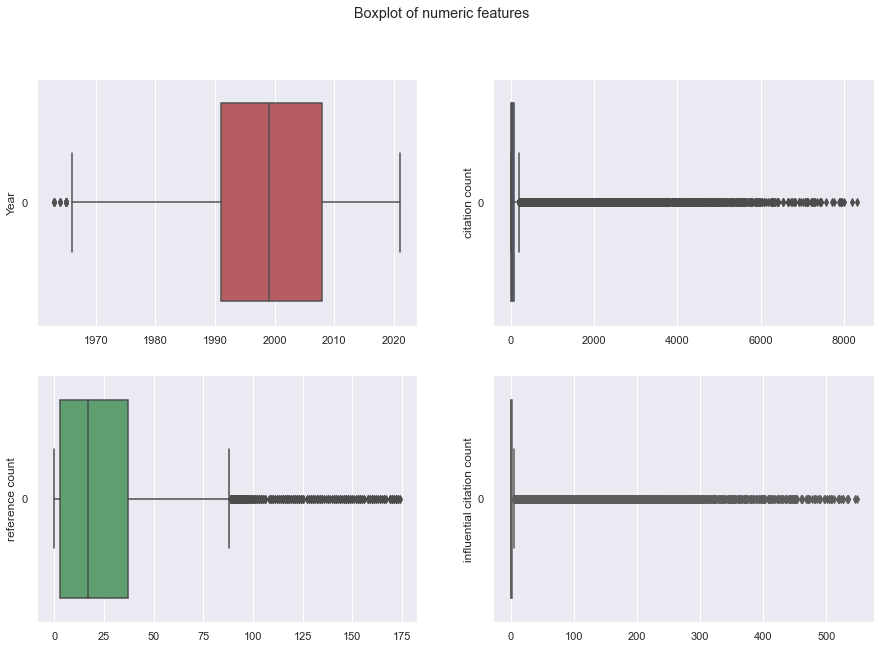

In [212]:
fig, axes = plt.subplots(2,2,figsize =(15,10))
fig.suptitle('Boxplot of numeric features')
sns.boxplot(ax= axes[0,0],data=year,orient='h',color='r').set(ylabel = 'Year')
sns.boxplot(ax=axes[1,0],data =ref,orient ='h',color='g').set(ylabel='reference count')
sns.boxplot(ax=axes[0,1],data=citation,orient='h',color='b').set(ylabel='citation count')
sns.boxplot(ax=axes[1,1],data=inf_citation,orient='h',color='c').set(ylabel='influential citation count')

In [214]:
#covariance matrix
corr = cby_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\61765\AppData\Local\Temp/ipykernel_12676/737223447.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,year,referenceCount,citationCount,influentialCitationCount,year0_citation_count,year1_citation_count,year2_citation_count,year3_citation_count,year4_citation_count,year5_citation_count,year6_citation_count,year7_citation_count,year8_citation_count,year9_citation_count
year,1.00,0.38,-0.14,0.08,0.14,0.15,0.12,0.13,0.13,0.10,0.07,0.05,0.00,-0.02
referenceCount,0.38,1.00,0.14,0.25,0.20,0.30,0.30,0.30,0.29,0.25,0.23,0.20,0.15,0.12
citationCount,-0.14,0.14,1.00,0.52,0.28,0.55,0.63,0.67,0.69,0.71,0.72,0.72,0.73,0.71
influentialCitationCount,0.08,0.25,0.52,1.00,0.20,0.35,0.38,0.41,0.42,0.44,0.43,0.44,0.43,0.41
year0_citation_count,0.14,0.20,0.28,0.20,1.00,0.44,0.34,0.31,0.28,0.26,0.24,0.23,0.21,0.19
year1_citation_count,0.15,0.30,0.55,0.35,0.44,1.00,0.71,0.66,0.63,0.56,0.51,0.46,0.40,0.36
year2_citation_count,0.12,0.30,0.63,0.38,0.34,0.71,1.00,0.75,0.71,0.64,0.58,0.53,0.48,0.42
year3_citation_count,0.13,0.30,0.67,0.41,0.31,0.66,0.75,1.00,0.75,0.69,0.62,0.58,0.53,0.48
year4_citation_count,0.13,0.29,0.69,0.42,0.28,0.63,0.71,0.75,1.00,0.72,0.67,0.61,0.55,0.50
year5_citation_count,0.10,0.25,0.71,0.44,0.26,0.56,0.64,0.69,0.72,1.00,0.71,0.66,0.60,0.56


<AxesSubplot:xlabel='influentialCitationCount', ylabel='Count'>

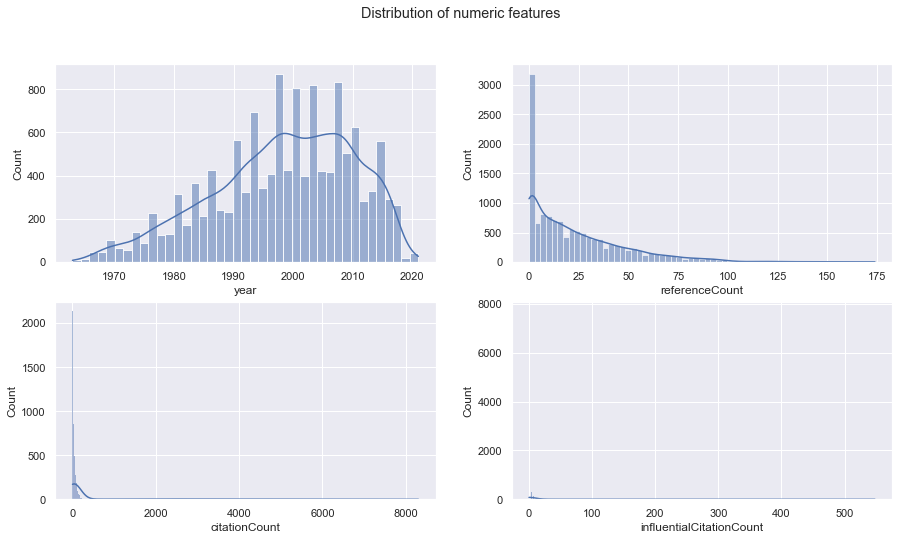

In [215]:
fig, axes = plt.subplots(2,2,figsize =(15,8))
fig.suptitle('Distribution of numeric features')
sns.histplot(ax= axes[0,0],x=year,kde = True)
sns.histplot(ax=axes[1,0], x=citation,kde=True)
sns.histplot(ax=axes[0,1],x=ref,kde=True)
sns.histplot(ax=axes[1,1],x=inf_citation,kde=True)

Text(0.5, 1.0, 'citation count for each discipline')

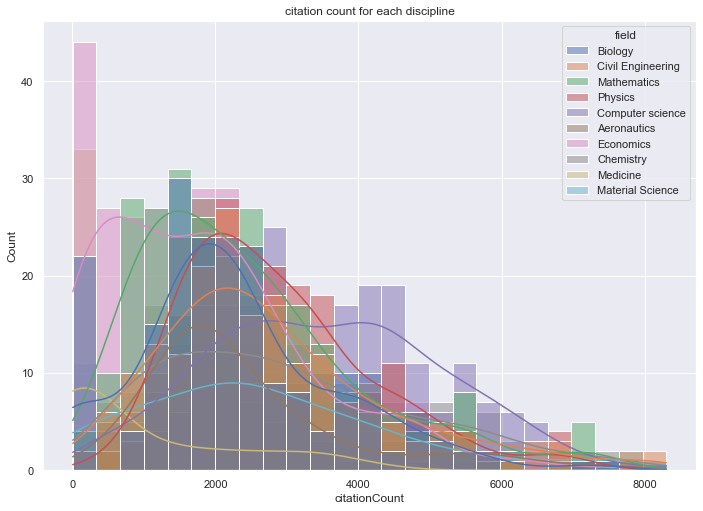

In [216]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax,data=df,x='citationCount',hue='field',kde = True).set_title('citation count for each discipline') #change x for other fields to get the distribution plot for each discipline in one plot

Text(0.5, 1.0, '20 most frequent words')

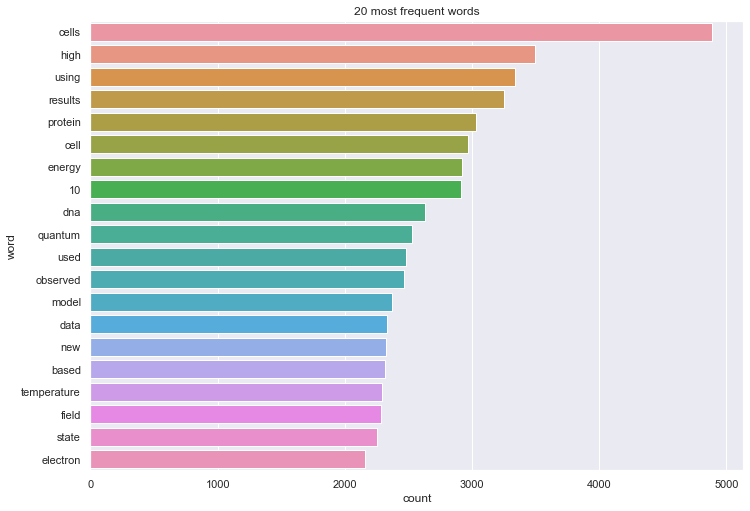

In [217]:
def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer( stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_unigram(abstract, 20)
df_1word = pd.DataFrame(common_words, columns = ['word' , 'count'])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax,data=df_1word,y='word',x='count').set_title('20 most frequent words')

Text(0.5, 1.0, '20 most frequent bigrams')

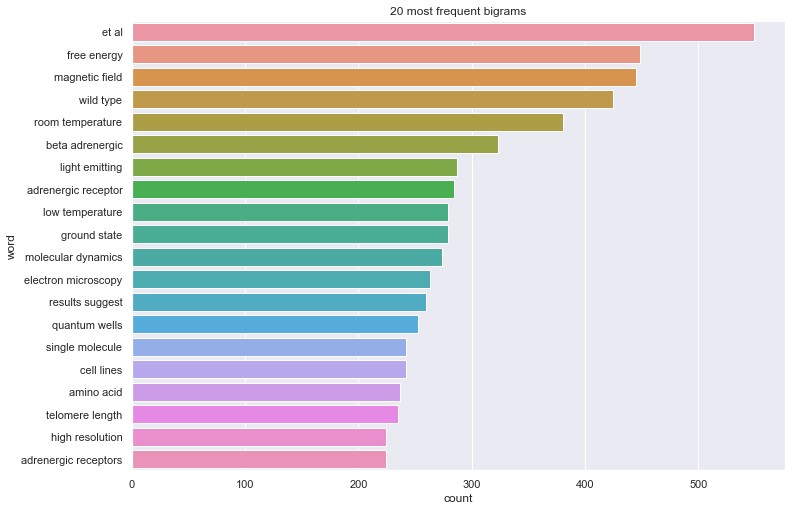

In [218]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(abstract, 20)
df_2word = pd.DataFrame(common_words, columns = ['word' , 'count'])
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax,data=df_2word,y='word',x='count').set_title('20 most frequent bigrams')

## Training some baseline models using only abstract as feature 

In [219]:
tf_vec = TfidfVectorizer(stop_words = 'english')
count_vec1 = CountVectorizer(stop_words= 'english')
count_vec2 = CountVectorizer(ngram_range=(2,2),stop_words='english')
y = citation
x_count1 = count_vec1.fit_transform(abstract)
x_count2 = count_vec2.fit_transform(abstract)
x_tf = tf_vec.fit_transform(abstract)
x_count1_train,x_count1_test,y_count1_train,y_count1_test = train_test_split(x_count1,y,test_size=0.4)
x_count2_train,x_count2_test,y_count2_train,y_count2_test = train_test_split(x_count2,y,test_size=0.4)
x_tf_train,x_tf_test,y_tf_train,y_tf_test = train_test_split(x_tf,y)

In [225]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(40,60):
    neigh = KNeighborsRegressor(i)
    print('num neighbors: {}'.format(i))
    print(sum(cross_val_score(neigh,x_count1,y,cv=5))/5)

num neighbors: 40
-42.61583499888944
num neighbors: 41
-42.336633078716964
num neighbors: 42
-42.041983155921606
num neighbors: 43
-41.80594531639623
num neighbors: 44
-41.62338141637339
num neighbors: 45
-41.547561563110385
num neighbors: 46
-41.47438880760671
num neighbors: 47
-41.43804305278164
num neighbors: 48
-41.362492503710385
num neighbors: 49
-41.474057354756646
num neighbors: 50
-41.388160697911744
num neighbors: 51
-41.525932342254166
num neighbors: 52
-41.538823084833325
num neighbors: 53
-41.52019852916733
num neighbors: 54
-41.60935768178496
num neighbors: 55
-41.595322213733866
num neighbors: 56
-41.6646008980626
num neighbors: 57
-41.65562637296965
num neighbors: 58
-41.65661894285891
num neighbors: 59
-41.5971633989954


In [222]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,10):
    tree = DecisionTreeRegressor(max_depth=i)
    print(i)
    print(sum(cross_val_score(tree,x_count1,y,cv=5))/5)

1
-84.01421147636668
2
-74.43609315092405
3
-75.86683878757984
4
-75.24218636421281
5
-74.81232632270199
6
-75.83711378489856
7
-76.45092316979017
8
-74.60952503106598
9
-75.94865321484306
